In [ ]:
# This code is adapted from https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid17.ipynb. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import numba

In [3]:
Nx = 201 # Number of x points in the grid
Nt = 100000 # Number of t points in the grid
dx = 1/(Nx-1) # Unit change in x
dt = 1e-7 # Unit change in t. This needs to be sufficiently small for the finite difference method to work.
x = np.linspace(0, 1, Nx) # Range and values of x

In [17]:
psi0 = np.sqrt(2) * np.sin(np.pi * x)  # Initial wave function at time t=0.
# Here it is the eigenstate of the infinite square well where V(x) = 0.


mu, sigma = 1/2, 1/20
V = -1e4 * np.exp(-(x - mu)**2/(2 * sigma**2))  # Potential is a Gaussian Well

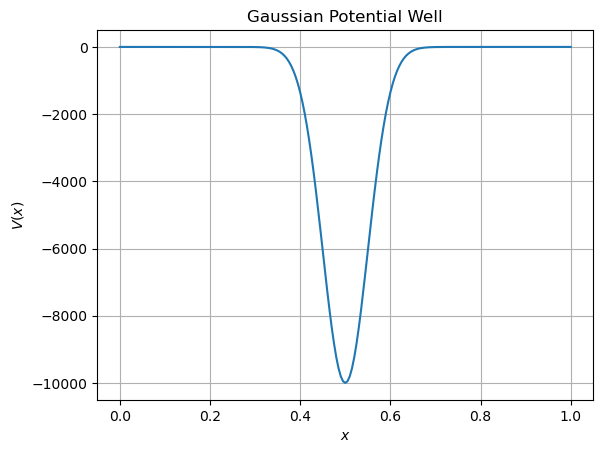

In [19]:
# Plot the Gaussian Potential
#plt.figure(figsize = (10, 6))
plt.plot(x, V)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.title('Gaussian Potential Well')
plt.grid()

In [21]:
psi = np.zeros([Nt, Nx])  # initalise array of zeros for wavefunction
psi[0] = psi0 # Put in the initial wavefunction (at time t=0)

In [23]:
@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True) # numba is used to speed up the computation
def compute_psi(psi):
    """Function to compute the wavefunction (iteratively) for each t. Takes as input the inital array of wavefunctions."""
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i] 
            # This is the iterative formula to compute the wavefunction at time t+1.

        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal  # Normalise wavefunction

    return psi

In [25]:
psi_result = compute_psi(psi.astype(complex)) # Find the solution. Since compute_psi involves complex numbers, psi is made complex.

Text(0.5, 1.0, 'PDF of Wavefunction from t=0 to t=10000')

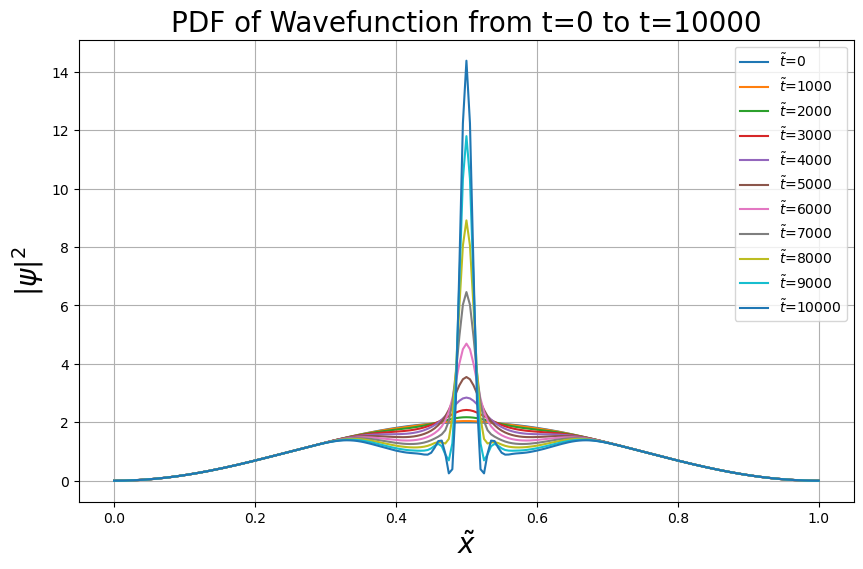

In [33]:
# Plot psi for times 0 to 10,000 in steps of 1,000.
plt.figure(figsize = (10, 6))
for m in range(0, 10001, 1000):
    plt.plot(x, np.absolute(psi_result[m])**2, label=fr"$\tilde{{t}}$={m}")
    #print(np.sum(np.absolute(psi_result[m])**2)*dx)
plt.legend()
plt.grid()
plt.xlabel(r"$\tilde{x}$", fontsize=20)
plt.ylabel(r"$|\psi|^2$", fontsize=20)
plt.title("PDF of Wavefunction from t=0 to t=10000", fontsize=20)

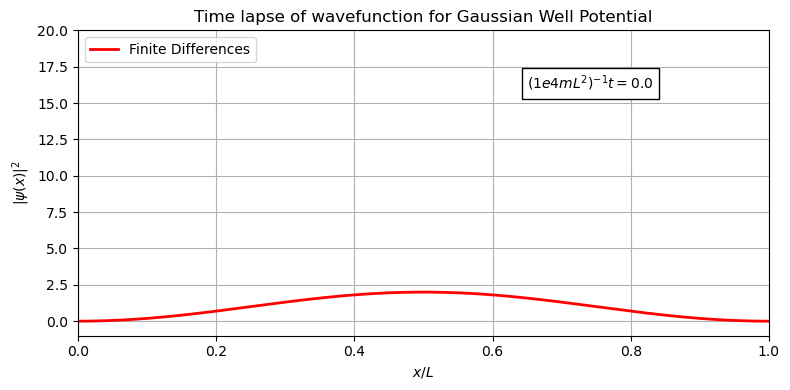

In [25]:
# This makes an animation of how psi varies with time. 500 frames were used and t goes from 0 to 50.

def animate(i):
    # Updates the line plot data to show the probability density (|ψ|²) at each 100th time step.
    ln.set_data(x, np.absolute(psi_result[100*i])**2) 
    # Shows time evolution as text.
    time_text.set_text('$(1e4mL^2)^{-1}t=$'+'{:.1f}'.format(100*i*dt*1e4)) # 1e4 is a scaling factor otherwise times are too small.
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.grid()
ln, = plt.plot([], [], 'r-', lw=2, markersize=8, label='Finite Differences')
time_text = ax.text(0.65, 16, '', fontsize=10,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(-1, 20)
ax.set_xlim(0,1)
ax.set_ylabel(r'$|\psi(x)|^2$', fontsize=10)
ax.set_xlabel(r'$x/L$', fontsize=10)
ax.legend(loc='upper left')
ax.set_title('Time lapse of wavefunction for Gaussian Well Potential')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
# ani.save('Animation.gif', writer='pillow', fps=50, dpi=100)     This saves the animation to a gif file.